In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.externals import joblib

In [2]:
out = Path('./0522_analysis')
if not out.exists():
    out.mkdir(parents=True)

in_1 = Path('./data/0518_iris_svm')
in_2 = Path('./data/0518_iris_softmax')
in_3 = Path('./data/0520_digits_svm')
in_4 = Path('./data/0520_digits_softmax')
in_5 = Path('./data/0521_digits_cnn_svm')
in_6 = Path('./data/0521_digits_cnn_softmax')

In [3]:
sns.set()

In [4]:
def print_performance(path):
    df_train = pd.read_csv(path.joinpath('train-performance.csv'))
    df_test = pd.read_csv(path.joinpath('test-performance.csv'))
    print('[Train]\n')
    print(df_train)
    print('\n[Test]\n')
    print(df_test)


In [5]:
def concat_graph(path_1, path_2):
    df_1 = pd.read_csv(path_1.joinpath('train.log.csv')).drop('epoch', axis=1)
    df_2 = pd.read_csv(path_2.joinpath('train.log.csv')).drop('epoch', axis=1)
    for df_k, name in zip([df_1, df_2], ['svm', 'softmax']):
        df_k.rename(
            columns={
                'acc': name + '-train-accuracy',
                'loss': name + '-train-loss',
                'val_acc': name + '-validation-accuracy',
                'val_loss': name + '-validation-loss'
            },
            inplace=True
        )
    df_acc = pd.concat(
        (
            df_1.loc[:, df_1.columns.str.endswith('accuracy')],
            df_2.loc[:, df_2.columns.str.endswith('accuracy')]
        )
    )
    df_loss = pd.concat(
        (
            df_1.loc[:, df_1.columns.str.endswith('loss')],
            df_2.loc[:, df_2.columns.str.endswith('loss')]
        )
    )
    
    return (df_acc, df_loss)

## Performance

### `Iris`

### -svm

In [6]:
print_performance(in_1)

[Train]

  Unnamed: 0   0.0        1.0        2.0   micro avg   macro avg  weighted avg
0   f1-score   1.0   0.936709   0.938272    0.958333    0.958327      0.958314
1  precision   1.0   0.973684   0.904762    0.958333    0.959482      0.960056
2     recall   1.0   0.902439   0.974359    0.958333    0.958933      0.958333
3    support  40.0  41.000000  39.000000  120.000000  120.000000    120.000000

[Test]

  Unnamed: 0   0.0  1.0   2.0  micro avg  macro avg  weighted avg
0   f1-score   1.0  1.0   1.0        1.0        1.0           1.0
1  precision   1.0  1.0   1.0        1.0        1.0           1.0
2     recall   1.0  1.0   1.0        1.0        1.0           1.0
3    support  10.0  9.0  11.0       30.0       30.0          30.0


### -softmax

In [7]:
print_performance(in_2)

[Train]

  Unnamed: 0   0.0        1.0        2.0   micro avg   macro avg  weighted avg
0   f1-score   1.0   0.936709   0.938272    0.958333    0.958327      0.958314
1  precision   1.0   0.973684   0.904762    0.958333    0.959482      0.960056
2     recall   1.0   0.902439   0.974359    0.958333    0.958933      0.958333
3    support  40.0  41.000000  39.000000  120.000000  120.000000    120.000000

[Test]

  Unnamed: 0   0.0  1.0   2.0  micro avg  macro avg  weighted avg
0   f1-score   1.0  1.0   1.0        1.0        1.0           1.0
1  precision   1.0  1.0   1.0        1.0        1.0           1.0
2     recall   1.0  1.0   1.0        1.0        1.0           1.0
3    support  10.0  9.0  11.0       30.0       30.0          30.0


### `Digits`

### -svm

In [8]:
print_performance(in_3)

[Train]

  Unnamed: 0    0.0         1.0         2.0         3.0         4.0  \
0   f1-score    1.0    0.984026    0.993007    0.986667    0.992537   
1  precision    1.0    0.968553    1.000000    0.980132    1.000000   
2     recall    1.0    1.000000    0.986111    0.993289    0.985185   
3    support  145.0  154.000000  144.000000  149.000000  135.000000   

          5.0         6.0        7.0         8.0         9.0    micro avg  \
0    0.988930    0.996564    0.97931    0.989547    0.978417     0.988866   
1    0.985294    1.000000    0.97931    0.993007    0.985507     0.988866   
2    0.992593    0.993151    0.97931    0.986111    0.971429     0.988866   
3  135.000000  146.000000  145.00000  144.000000  140.000000  1437.000000   

     macro avg  weighted avg  
0     0.988900      0.988877  
1     0.989180      0.988988  
2     0.988718      0.988866  
3  1437.000000   1437.000000  

[Test]

  Unnamed: 0        0.0        1.0        2.0        3.0   4.0        5.0  \
0   f1-s

### -softmax

In [9]:
print_performance(in_4)

[Train]

  Unnamed: 0    0.0         1.0         2.0         3.0         4.0    5.0  \
0   f1-score    1.0    0.987097    0.996516    0.993333    0.988848    1.0   
1  precision    1.0    0.980769    1.000000    0.986755    0.992537    1.0   
2     recall    1.0    0.993506    0.993056    1.000000    0.985185    1.0   
3    support  145.0  154.000000  144.000000  149.000000  135.000000  135.0   

     6.0         7.0         8.0         9.0    micro avg    macro avg  \
0    1.0    0.996540    0.986111    0.996416     0.994433     0.994486   
1    1.0    1.000000    0.986111    1.000000     0.994433     0.994617   
2    1.0    0.993103    0.986111    0.992857     0.994433     0.994382   
3  146.0  145.000000  144.000000  140.000000  1437.000000  1437.000000   

   weighted avg  
0      0.994439  
1      0.994473  
2      0.994433  
3   1437.000000  

[Test]

  Unnamed: 0   0.0        1.0        2.0        3.0        4.0        5.0  \
0   f1-score   1.0   0.982456   0.927536   0.953846  

### -cnn_svm

In [10]:
print_performance(in_5)

[Train]

  Unnamed: 0    0.0         1.0         2.0         3.0         4.0  \
0   f1-score    1.0    0.987179    0.993007    0.990033    0.996283   
1  precision    1.0    0.974684    1.000000    0.980263    1.000000   
2     recall    1.0    1.000000    0.986111    1.000000    0.992593   
3    support  145.0  154.000000  144.000000  149.000000  135.000000   

          5.0    6.0         7.0         8.0         9.0    micro avg  \
0    0.992537    1.0    0.996564    0.989474    0.992857     0.993737   
1    1.000000    1.0    0.993151    1.000000    0.992857     0.993737   
2    0.985185    1.0    1.000000    0.979167    0.992857     0.993737   
3  135.000000  146.0  145.000000  144.000000  140.000000  1437.000000   

     macro avg  weighted avg  
0     0.993793      0.993744  
1     0.994095      0.993853  
2     0.993591      0.993737  
3  1437.000000   1437.000000  

[Test]

  Unnamed: 0        0.0        1.0   2.0        3.0   4.0        5.0  \
0   f1-score   0.984615   0.98245

### -cnn_softmax

In [11]:
print_performance(in_6)

[Train]

  Unnamed: 0    0.0         1.0    2.0         3.0    4.0         5.0    6.0  \
0   f1-score    1.0    0.996764    1.0    0.989967    1.0    0.996283    1.0   
1  precision    1.0    0.993548    1.0    0.986667    1.0    1.000000    1.0   
2     recall    1.0    1.000000    1.0    0.993289    1.0    0.992593    1.0   
3    support  145.0  154.000000  144.0  149.000000  135.0  135.000000  146.0   

          7.0         8.0         9.0    micro avg    macro avg  weighted avg  
0    0.993103    0.993056    0.996416     0.996521     0.996559      0.996523  
1    0.993103    0.993056    1.000000     0.996521     0.996637      0.996534  
2    0.993103    0.993056    0.992857     0.996521     0.996490      0.996521  
3  145.000000  144.000000  140.000000  1437.000000  1437.000000   1437.000000  

[Test]

  Unnamed: 0   0.0   1.0        2.0        3.0   4.0        5.0        6.0  \
0   f1-score   1.0   1.0   0.984615   0.956522   1.0   0.958333   0.971429   
1  precision   1.0   1.0 

## Accuracy and Loss graph

### Iris

In [12]:
df_iris_acc, df_iris_loss = concat_graph(in_1, in_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



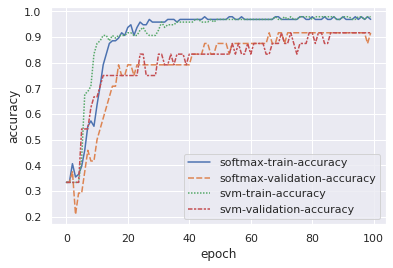

In [13]:
sns.lineplot(data=df_iris_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig(out.joinpath('iris-acc.pdf'))

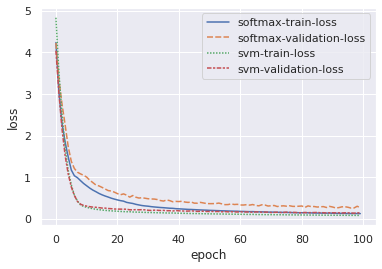

In [14]:
sns.lineplot(data=df_iris_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig(out.joinpath('iris-loss.pdf'))

### Digits

In [15]:
df_digits_acc, df_digits_loss = concat_graph(in_3, in_4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



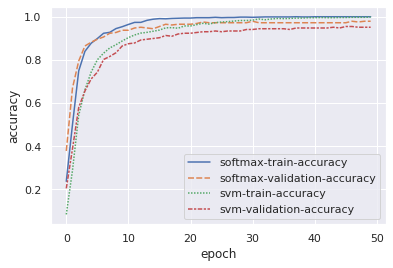

In [16]:
sns.lineplot(data=df_digits_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig(out.joinpath('digits-acc.pdf'))

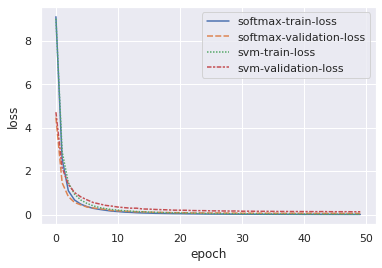

In [17]:
sns.lineplot(data=df_digits_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig(out.joinpath('digits-loss.pdf'))

### Digits cnn

In [18]:
df_digits_cnn_acc, df_digits_cnn_loss = concat_graph(in_5, in_6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



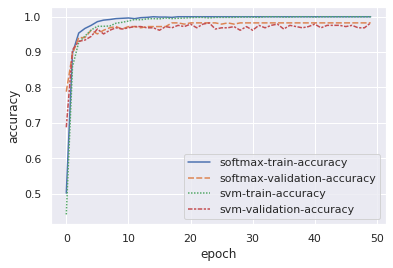

In [19]:
sns.lineplot(data=df_digits_cnn_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig(out.joinpath('digits-cnn-acc.pdf'))

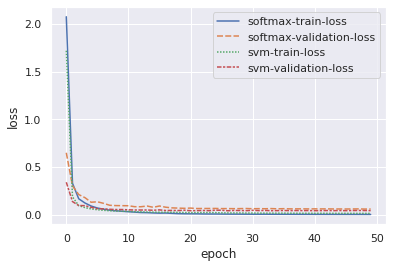

In [20]:
sns.lineplot(data=df_digits_cnn_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig(out.joinpath('digits-cnn-loss.pdf'))